<a href="https://colab.research.google.com/github/lahi0008/DOUA.github.io/blob/master/Deep_learning_CNNModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Matplotlib
import matplotlib.pyplot as plt
# Tensorflow
import tensorflow as tf
# Numpy and Pandas
import numpy as np
import pandas as pd
# Ohter import
import sys

In [ ]:
from google.colab import files


In [ ]:
from IPython.display import Image

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from __future__ import absolute_import, division, print_function, unicode_literals

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#HERE WE LOAD THE DATASET, JUST Adhered AND Ballasted 
_URL = '/content/drive/MyDrive'


#there are validation and train, so we need two different paths to find them 
train_dir = "/content/drive/MyDrive/train"
validation_dir = "/content/drive/MyDrive/validation"

#inside of those packets we have the 2 data sets, adhered and ballashed, so we need to tag them 
train_adhered_dir = "/content/drive/MyDrive/train/Adhered" # directory with our training adhered pictures
train_ballashed_dir = "/content/drive/MyDrive/train/Ballasted"  # directory with our training ballashed pictures
validation_adhered_dir = "/content/drive/MyDrive/validation/Adhered"  # directory with our validation adhered pictures
validation_ballashed_dir = "/content/drive/MyDrive/validation/Ballasted"  # directory with our validation ballashed pictures

In [ ]:
#we will analize the data
num_adhered_tr = len(os.listdir(train_adhered_dir)) #this is the length of the images of adhered to train
num_ballashed_tr = len(os.listdir(train_ballashed_dir)) #this is the length of the images of ballashed to train

num_adhered_val = len(os.listdir(validation_adhered_dir)) #this is the length of the images of adhered for validation
num_ballashed_val = len(os.listdir(validation_adhered_dir)) #this is the length of the images of adhered for validation

total_train = num_adhered_tr + num_ballashed_tr #total of pictures of validation
total_val = num_adhered_val + num_ballashed_val #total of pictures of train

print('total training adhered images:', num_adhered_tr) #print the numer of adhered pictures to train 
print('total training ballashed images:', num_ballashed_tr) #print the numer of ballashed pictures to train 

print('total validation adhered images:', num_adhered_val) #print the numer of adhered pictures to valitation
print('total validation ballashed images:', num_ballashed_val) #print the numer of ballashed pictures to validation
print("--")
print("Total training images:", total_train) #print the total numer of adhered pictures 
print("Total validation images:", total_val) #print the total numer of ballashed pictures

total training adhered images: 0
total training ballashed images: 597
total validation adhered images: 1
total validation ballashed images: 1
--
Total training images: 597
Total validation images: 2


Found 596 images belonging to 7 classes.
Found 443 images belonging to 3 classes.


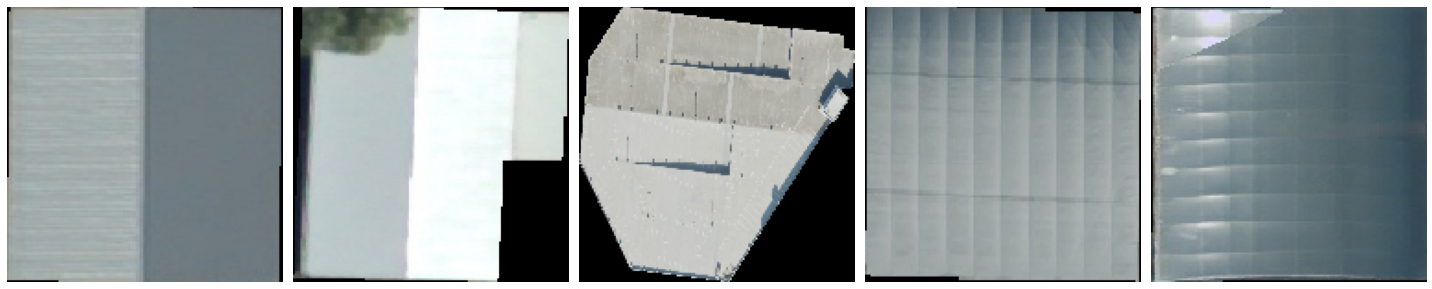

In [ ]:
batch_size = 128 # number of samples that will be propagated through the network
epochs = 15 # numer of forward an backward pass for each batch_size
IMG_HEIGHT = 150 #height of the pictures
IMG_WIDTH = 150 #width of the pictures

train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data and rescale 
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data and rescale
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size, #prepare the data for training giving:
                                                           directory=train_dir, #address
                                                           shuffle=True,        
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH), #size
                                                           class_mode='binary') #the output

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size, #prepare the data for validation giving:
                                                              directory=validation_dir, #address
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH), #size
                                                              class_mode='binary')      #output
#takes a image of the train data
sample_training_images, _ = next(train_data_gen)

# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5]) #plot 5 images random of training dataset 


Found 596 images belonging to 7 classes.


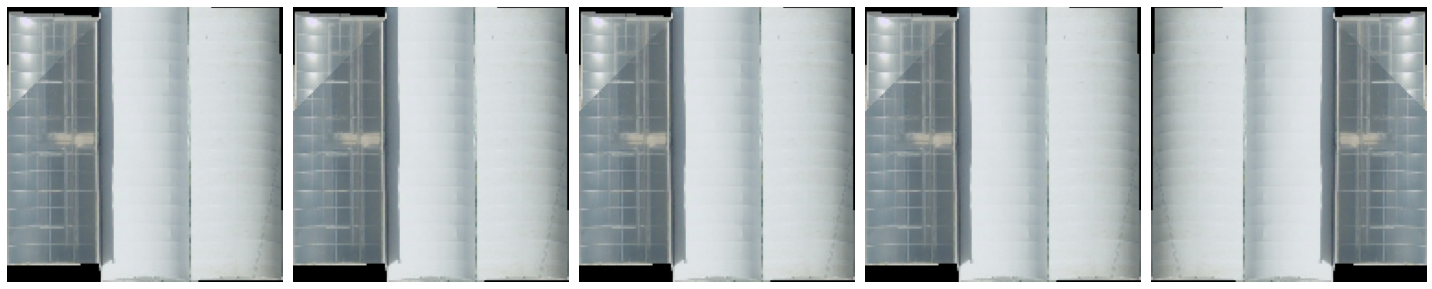

In [ ]:
#we need to apply some variations at the images because the pictures are not always perfect, obviusly! :p
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# Re-use the same custom plotting function defined and used
# above to visualize the training images
plotImages(augmented_images)

Found 596 images belonging to 7 classes.


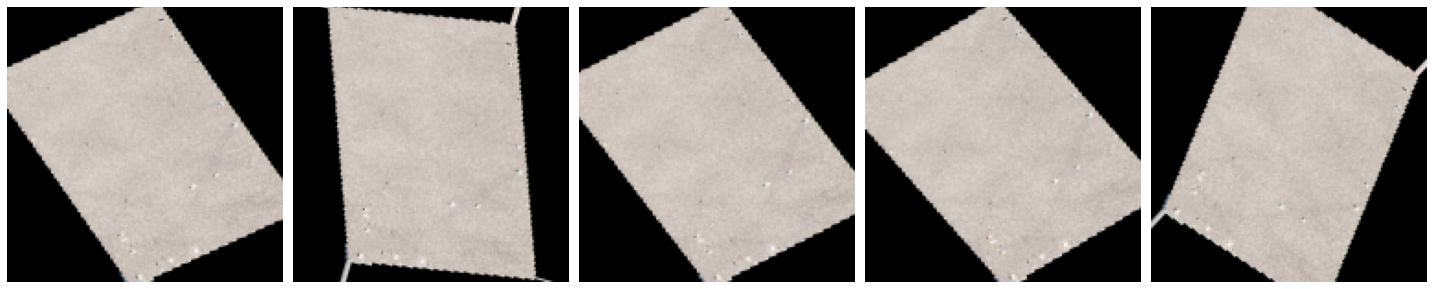

In [ ]:
#morw of the same, but 45º
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 596 images belonging to 7 classes.


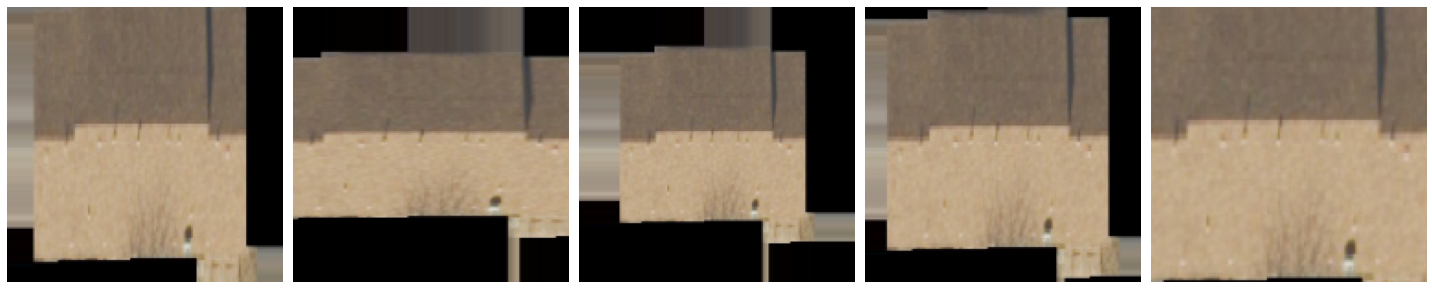

In [ ]:
# zoom_range from 0 - 1 where 1 = 100%.
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5) 
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size,
                                               directory=train_dir,
                                               shuffle=True,
                                               target_size=(IMG_HEIGHT, IMG_WIDTH))

augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

Found 596 images belonging to 7 classes.


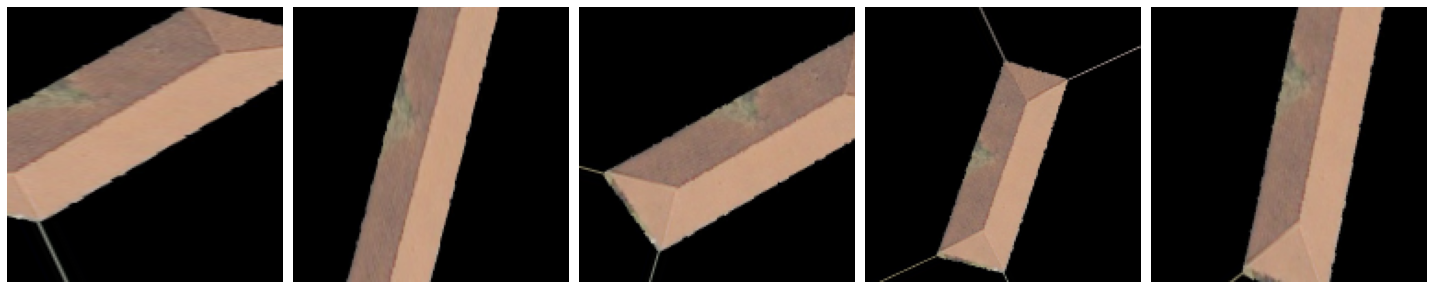

Found 443 images belonging to 3 classes.


In [ ]:
#all together 
image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)
#in validation we don't do nothing because are an example of how real image should be
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=validation_dir,
                                                 target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                 class_mode='binary')


In [ ]:

model_enfa = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', #convolution with 16 filterns of 3 of size
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),                                     #drop out of 20% to turn off 20% on neurons
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),                                   #drop out of 20% to turn off 20% on neurons
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1)
])


In [ ]:
model_enfa.compile(optimizer='adam',
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])

model_enfa.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 64)       

In [116]:
history = model_enfa.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from keras.models import load_model

def predict(file):
  x = load_img(file, target_size=(150, 150))
  x = img_to_array(x)
  x = np.expand_dims(x, axis=0)
  array = model_enfa.predict(x)
  result = array[0]
  answer = np.argmax(result)
  if answer == 0:
    print("pred: cat")
  elif answer == 1:
    print("pred: dog")
  return answer
predict('cat.4003.jpg')

In [ ]:
import sys
import os
target_dir = './modelo/'
if not os.path.exists(target_dir):
  os.mkdir(target_dir)
model_enfa.save('./modelo/modelo.h5')
model_enfa.save_weights('./modelo/pesos.h5')

#MLP Model for classifiation

In [117]:
model = Sequential([
    Flatten(input_shape=(28, 28)),    # reshape 28 row * 28 column data to 28*28 rows
    Dense(256, activation='sigmoid'), # dense layer 1
    Dense(128, activation='sigmoid'), # dense layer 2
    Dense(10, activation='softmax'),  # dense layer 3
])

In [118]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(train_data_gen, epochs=10, batch_size=2000,validation_steps)